<a href="https://colab.research.google.com/github/rimjhimittal/nlp/blob/main/Implementing_FeedForward_NN_using_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt

**Step 0: Preparing data**

In [ ]:
training_data=torchvision.datasets.MNIST(root='./data',
                                         train=True,
                                         transform=torchvision.transforms.ToTensor(),
                                         download=True
                                         )
test_data=torchvision.datasets.MNIST(root='./data',
                                     train=False,
                                     transform=torchvision.transforms.ToTensor()
                                     )

100%|██████████| 9912422/9912422 [00:00<00:00, 71308016.62it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 29000644.92it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 28530081.21it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4755498.94it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
training_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

**Splitting Data in batches using DataLoader**

In [ ]:
train_loader=torch.utils.data.DataLoader(dataset=training_data,
                                         batch_size=128,
                                         num_workers=2
                                         )
test_loader=torch.utils.data.DataLoader(dataset=test_data,
                                         batch_size=128,
                                         num_workers=2
                                         )

**Getting one batch**

In [ ]:
example=iter(train_loader)
image,label=next(example)

**Plotting Few images of First Batch**

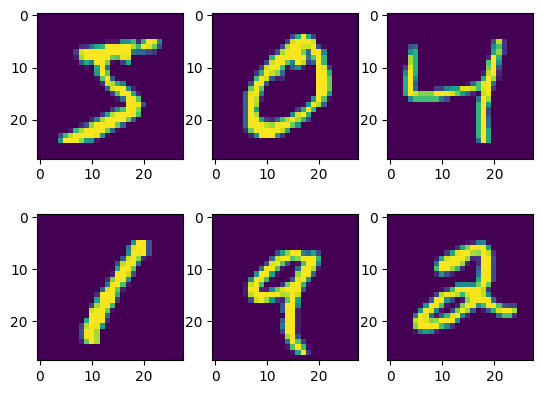

In [ ]:
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(image[i][0])
plt.show()

**Setting Parameters**

In [ ]:
num_epochs=3
learning_rate=0.001
input_size=784 #(28*28)
hidden_units=500 #(hidden layer 1: number of units)
output_size=10 #(10 unique labels for number of digits from 0-9)

**Step 1: Defining Neural Network**

In [ ]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
class neural_nn(nn.Module):
  def __init__(self,input_size,hidden_units,output_size):
    super(neural_nn,self).__init__()
    self.input_size=input_size
    self.l1=nn.Linear(input_size,hidden_units)
    self.relu=nn.ReLU()
    self.l2=nn.Linear(hidden_units,output_size)
  def forward(self,x):
    out=self.l1(x)
    out=self.relu(out)
    out=self.l2(out)
    return out
model=neural_nn(input_size,hidden_units,output_size).to(device)

**Step2: optimizer and Loss**

In [ ]:
optimizer=torch.optim.Adam(params=model.parameters(),lr=learning_rate)
criterion=nn.CrossEntropyLoss()

**Training the neural network**

In [ ]:
number_of_steps=len(train_loader)
for epochs in range(num_epochs):
  for i,(images,labels) in enumerate(train_loader):
    images=images.reshape(-1,28*28).to(device)
    labels=labels.to(device)
    #Forward_pass
    outputs=model(images)
    loss=criterion(outputs,labels)
    #Backward_pass and updation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('iteration:'+str(epochs)+' step:'+str(i)+' loss:'+str(loss.item()))

iteration:0 step:0 loss:0.05007172375917435
iteration:0 step:1 loss:0.12389621138572693
iteration:0 step:2 loss:0.03233245760202408
iteration:0 step:3 loss:0.13977257907390594
iteration:0 step:4 loss:0.07235335558652878
iteration:0 step:5 loss:0.10569988936185837
iteration:0 step:6 loss:0.0815194621682167
iteration:0 step:7 loss:0.06794378161430359
iteration:0 step:8 loss:0.1934235394001007
iteration:0 step:9 loss:0.13625618815422058
iteration:0 step:10 loss:0.11819387972354889
iteration:0 step:11 loss:0.032713476568460464
iteration:0 step:12 loss:0.082268126308918
iteration:0 step:13 loss:0.047342751175165176
iteration:0 step:14 loss:0.027989057824015617
iteration:0 step:15 loss:0.08173156529664993
iteration:0 step:16 loss:0.03323780372738838
iteration:0 step:17 loss:0.03434876725077629
iteration:0 step:18 loss:0.040842458605766296
iteration:0 step:19 loss:0.025393398478627205
iteration:0 step:20 loss:0.10425592958927155
iteration:0 step:21 loss:0.08322083950042725
iteration:0 step:22

In [ ]:
with torch.no_grad():
  n_samples=0
  n_correct=0
  for images,labels in test_loader:
    images=images.reshape(-1,28*28).to(device)
    labels=labels.to(device)
    outputs=model(images)
    _,predicted=torch.max(outputs.data,1)
    n_correct+=(predicted==labels).sum().item()
    n_samples+=label.size(0)
accuracy=(n_correct*100)/n_samples
print(accuracy)



96.60799050632912
